# Capstone Project - Predicting Student Final Results

#### Model Objectives:


#### About the Dataset:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

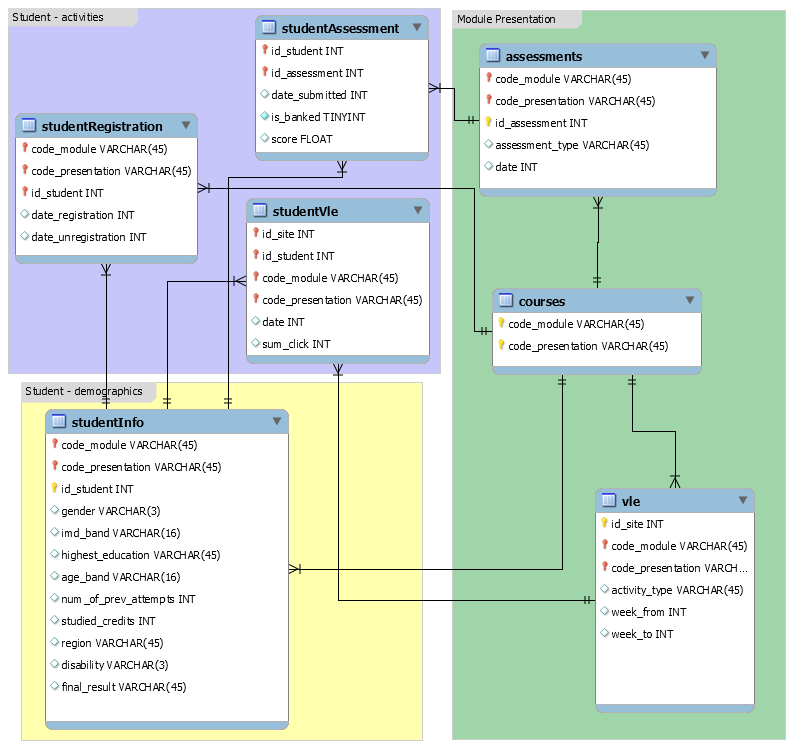

In [2]:
Image("data/model.png")

In [6]:
#loading the studentInfo table
st = pd.read_csv('data/studentInfo.csv')
st.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [19]:
st.isna().sum()

code_module               0
code_presentation         0
id_student                0
gender                    0
region                    0
highest_education         0
imd_band                912
age_band                  0
num_of_prev_attempts      0
studied_credits           0
disability                0
final_result              0
dtype: int64

In [20]:
#FIX MISSING VALUES
#EXPLORE: imd_band

**StudentInfo Dataset description:**
* There are 32953 rows in the dataset, but only **28785 unique students**
* 52% of students are male, 48% of students are female
* 84% of students level of education is A level or below
* 70% of student are 35 or under, 29% is between 35 and 55, the remaining 1% is above the age of 55 
* 10% of students have a disability

Due to some student repeating modules, for the initial demographic analysis I will remove their duplicate information and only keep one record per student.

In [7]:
#dropping multiple records from the dataset
st_clean = pd.DataFrame.drop_duplicates (st, subset = 'id_student')

M    0.522703
F    0.477297
Name: gender, dtype: float64

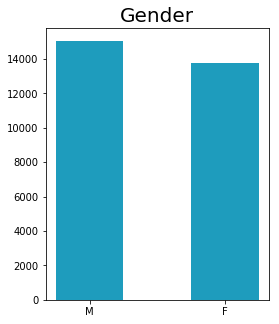

In [11]:
def plot_cat_var(column,title,size=(10,6)):
    new_d = dict(column.value_counts())
    d_keys = list(new_d.keys())
    d_values = list(new_d.values())

    plt.figure(figsize=size)
    plt.bar(d_keys, d_values,color='#1e9cbd', width=0.5)
    plt.title(title,fontsize=20)

plot_cat_var(st_clean.gender,'Gender',size=(4,5))
st_clean.gender.value_counts(normalize=True)

A Level or Equivalent          0.429217
Lower Than A Level             0.409241
HE Qualification               0.142157
No Formal quals                0.010631
Post Graduate Qualification    0.008755
Name: highest_education, dtype: float64

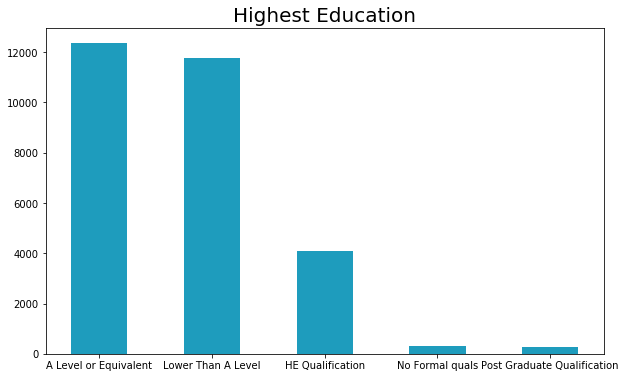

In [12]:
plot_cat_var(st_clean.highest_education,'Highest Education')
st_clean.highest_education.value_counts(normalize=True)

0-35     0.699844
35-55    0.293973
55<=     0.006184
Name: age_band, dtype: float64

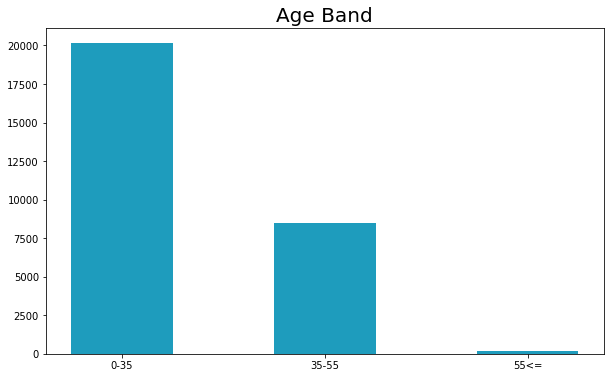

In [13]:
plot_cat_var(st_clean.age_band,'Age Band')
st_clean.age_band.value_counts(normalize=True)

N    0.905611
Y    0.094389
Name: disability, dtype: float64

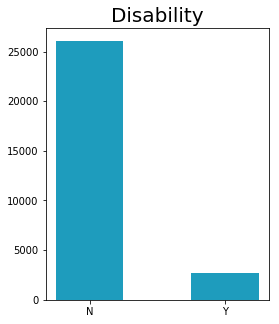

In [18]:
plot_cat_var(st_clean.disability,'Disability',size=(4,5))
st_clean.disability.value_counts(normalize=True)

**Final Results**
* 38% of students have finished their modules + 10% with a distinction
* 31% have withdrawn from a module
* 21% of students failed
* OPTION OF ANALYSIS - DOES THE AMOUNT OF INTERACTIONS EFFECT OF GETTING A DISTINCTION?

Pass           0.376342
Withdrawn      0.314157
Fail           0.217613
Distinction    0.091888
Name: final_result, dtype: float64

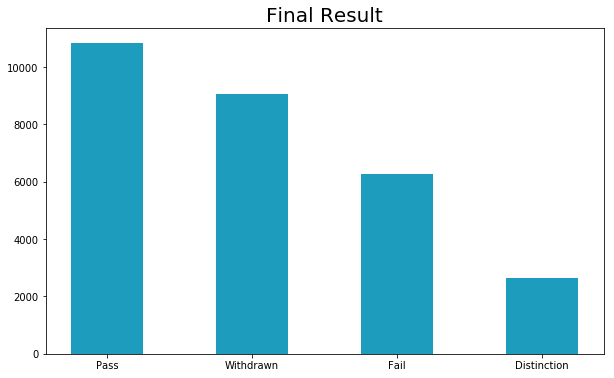

In [21]:
plot_cat_var(st_clean.final_result,'Final Result')
st_clean.final_result.value_counts(normalize=True)

My projected model's objective is to predict students who are likely to fail or withdraw from their module. Predicting whether a student will get a destiction is pointless for this task. For this reason, I will join students who pass with or without distinction into the same class 'Pass'.

In [23]:
#Joining 'Distinction' class with 'Pass'
st.loc[st['final_result'] == 'Distinction'] = 'Pass'

## Virtual Learning Environment Dataset (VLE)

- This table contains information about student's interactions with the virtual learning environment. 

- the materials provided in the VLE are mostly HTML pages and PDF files
- 'id_site' variable refers to the study material
- 'date' the date of the student's interaction with the material
- 'sum_click' - the number of times the student interacted with the material

In [24]:
vle = pd.read_csv('data/studentVle.csv')

In [13]:
vle.head()
#this datasetset has no missing values

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [28]:
print(len(vle.id_student.unique()))

26074


There are 26074 unique students have interacted with the VLE, but there are 28785 unique students overall. It suggests that there might be 2711 students who have not used the VLE at all.

I will now find students who are not in the VLE table to investigate their results.

In [30]:
#CAN BE DELETED?
#creating a list of students from VLE and the ST table
#unique_vle_students = list(vle.id_student.unique())
#unique_total_students = list(st_clean.id_student.unique())

In [31]:
#let's find you which students are not in the VLE table
unique_vle_students = set(vle.id_student)
unique_total_students = set(st_clean.id_student)

#this is a list of students who are not present in VLE df
students_not_in_vle = list(unique_total_students.difference(unique_vle_students))

#this is a dataframe with information about students who are not present in the VLE df
df_not_in_vle = st_clean[st_clean.id_student.isin(students_not_in_vle)]

Withdrawn    0.879749
Fail         0.119144
Pass         0.001107
Name: final_result, dtype: float64

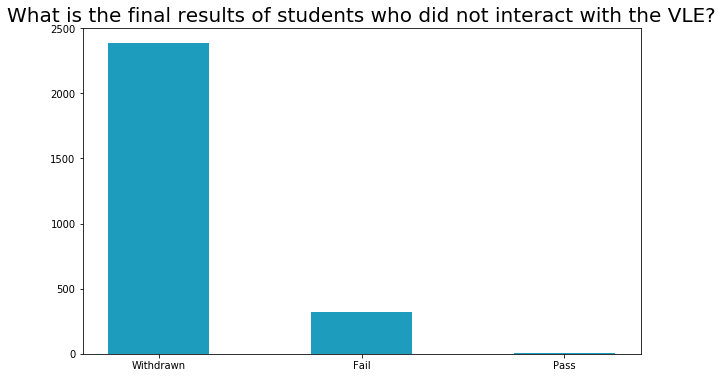

In [32]:
plot_cat_var(df_not_in_vle.final_result,'What is the final results of students who did not interact with the VLE?')
df_not_in_vle.final_result.value_counts(normalize=True)

The students who have not used the VLE at all have mostly withdrawn from the module or failed.
This suggest that these are the students who have changed their minds about the module and left without ever using the VLE. Their data will not be useful for the model.

However, there is 12% of students who failed their module in this dataset.

DECIDE WHAT TO DO
ADD THE FAILED STUDENTS TO MAIN TABLE

In [35]:
#removing student who did not interact with VLE from the dataset

#this is now a df with only students who are also in the VLE table
st_actives = st[st['id_student'].isin(students_not_in_vle) == False]


In [38]:
len(st_actives)

29741

In [39]:
len(st)

32593

### Joining Student and VLE datasets

I will create a dataset with information about students and their interactions in VLE.

This table will be module-oriented, rather than student oriented, because there is some students who have studied multiple modules that were chosen for this data.

In [40]:
#This information won't be useful - dropiing columns
vle_for_joining = vle.drop(['id_site','date'],axis =1)

In [41]:
vle_for_joining.isna().sum()

code_module          0
code_presentation    0
id_student           0
sum_click            0
dtype: int64

In [42]:
#Here I will sum all clicks/interactions from the VLE table per module studied
df_sum_click = vle_for_joining.groupby(['code_module', 'code_presentation','id_student']).agg({'sum_click': ['sum']})

In [45]:
df_sum_click.head()

sum_of_clicks
code_module code_presentation id_student               
AAA         2013J             11391                 934
                              28400                1435
                              30268                 281
                              31604                2158
                              32885                1034

In [44]:
df_sum_click.columns = ['sum_of_clicks']

In [46]:
#setting a new index
df_sum_click_new_index = df_sum_click.reset_index()

In [47]:
df_sum_click_new_index.head()

,code_module,code_presentation,id_student,sum_of_clicks
0,AAA,2013J,11391,934
1,AAA,2013J,28400,1435
2,AAA,2013J,30268,281
3,AAA,2013J,31604,2158
4,AAA,2013J,32885,1034


In [48]:
df_sum_click_new_index.isna().sum()

code_module          0
code_presentation    0
id_student           0
sum_of_clicks        0
dtype: int64

In [49]:
#merging the ST dataset with the above dataset
st_actives_with_vle = pd.merge(st_actives, df_sum_click_new_index,
                               how='left',
                               on=['code_module','code_presentation','id_student'])




In [50]:
st_actives_with_vle.head()
#this df now contains the total number of clicks per module and presentation!!

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_of_clicks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0


In [34]:
len(st_actives_with_vle)

29741

In [36]:
st_actives_with_vle.isna().sum()
#FIND THE REASON BEHIND THE NANS

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                 865
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
sum_of_clicks           3537
dtype: int64

In [37]:
st_actives_with_vle.loc[st_actives_with_vle.sum_of_clicks.isna() == True]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_of_clicks
43,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,NaN
78,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,NaN
87,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,NaN
115,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,NaN
124,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29720,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,NaN
29727,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,NaN
29735,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,NaN
29737,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,NaN


In [38]:
#FIND OUT THE REASONS BEHIND THE MISSING VALUES - I WILL DROP THEM FOR NOW
st_actives_with_vle.dropna(inplace=True)

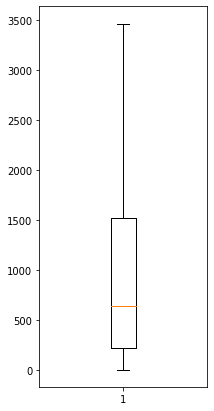

In [39]:
plt.figure(figsize=(3,7))
plt.boxplot(st_actives_with_vle.sum_of_clicks,showfliers=False);

In [40]:
st_actives_with_vle.sum_of_clicks.describe()

count    25349.000000
mean      1179.353623
std       1547.157049
min          1.000000
25%        217.000000
50%        633.000000
75%       1517.000000
max      24139.000000
Name: sum_of_clicks, dtype: float64

Distribution of clicks:
* Median - 717 clicks
* Mean - 1326
* this is a heavily skewed distribution due to the large number of outliers
* normalisation might help with outliers

In [41]:
#renaming df
df = st_actives_with_vle.copy()
df.rename(columns={"final_result": "target"}, inplace=True)

#### Dropping unneccesary columns

In [42]:
to_drop = ['id_student']
df.drop(to_drop, axis=1,inplace=True)

In [43]:
df.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,target,sum_of_clicks
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934.0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435.0
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281.0
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158.0
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034.0


In [44]:
#df.loc[df['target'] == 'Distinction'] = 'Pass'

In [45]:
type(df.target[2]) == type(df.target[0])

True

#### Creating dummy variables

In [46]:
#selecting categorical columns
cat_cols = ['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band','disability']

df = pd.get_dummies(data=df,columns = cat_cols)

In [47]:
df.head()

,num_of_prev_attempts,studied_credits,target,sum_of_clicks,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,...,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,0,240,Pass,934.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,60,Pass,1435.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,60,Withdrawn,281.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,60,Pass,2158.0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,60,Pass,1034.0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [48]:
df.columns

Index(['num_of_prev_attempts', 'studied_credits', 'target', 'sum_of_clicks',
       'code_module_AAA', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'code_presentation_2013B', 'code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J', 'gender_F',
       'gender_M', 'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_0-10%',

In [49]:
df.rename(columns={'age_band_55<=': "55+"}, inplace=True)

#### Splitting dataset - training, validation, testing set

In [50]:
from sklearn.model_selection import train_test_split

#I am going to cut away a random 5% of the dataset for final testing.

X_testing_set = df.drop('target',axis=1)
y_testing_set = df.target

#ts = 'TESTING SET'
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(X_testing_set, y_testing_set, test_size=0.05, random_state=123)

In [51]:
#putting my df back together
df = pd.concat([X_train_ts, y_train_ts],axis=1)

The following variables now contain the 5% testing set

df validation set:
   * y_test_ts - labels
   * X_test_ts - data

Creating the validation set (10% of data)

In [52]:
X = df.drop('target',axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

### Tackling class imbalace

Pass         0.466550
Withdrawn    0.274283
Fail         0.259167
Name: target, dtype: float64

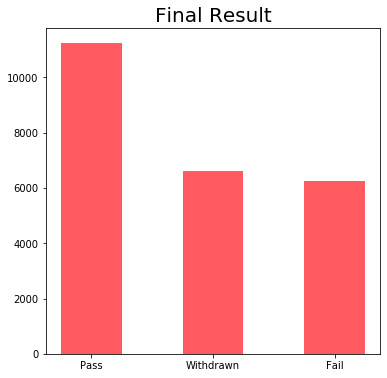

In [53]:
plot_cat_var(df.target,'Final Result',size=(6,6))
df.target.value_counts(normalize=True)

In [54]:
#to avoid data leakage when using SMOTE, I have split the data beforehand

from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=12)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [56]:
#putting upsampled dataset back together
X_train = pd.DataFrame(X_train, columns=X_train_ts.columns)
y_train = pd.Series(y_train)

df = pd.concat([X_train,y_train],axis=1)

In [57]:
df.rename(columns={0: "target"}, inplace=True)

In [58]:
df.shape

(30318, 50)

In [59]:
df.head()

,num_of_prev_attempts,studied_credits,sum_of_clicks,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,...,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,55+,disability_N,disability_Y,target
0,0,120,1921.0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,Pass
1,0,60,2445.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,Pass
2,0,30,1420.0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Pass
3,0,180,3264.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,Pass
4,0,60,582.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,Withdrawn


Fail         0.333333
Pass         0.333333
Withdrawn    0.333333
Name: target, dtype: float64

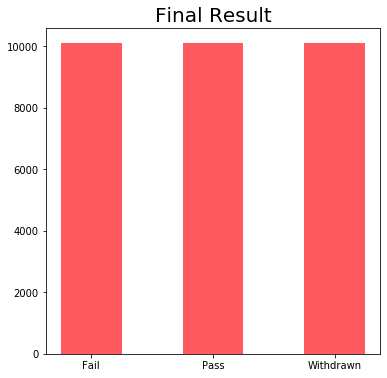

In [60]:
plot_cat_var(df.target,'Final Result',size=(6,6))
df.target.value_counts(normalize=True)

In [61]:
X_train.columns

Index(['num_of_prev_attempts', 'studied_credits', 'sum_of_clicks',
       'code_module_AAA', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'code_presentation_2013B', 'code_presentation_2013J',
       'code_presentation_2014B', 'code_presentation_2014J', 'gender_F',
       'gender_M', 'region_East Anglian Region', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_0-10%',
       'i

## Modelling

In [62]:
#importing libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

#import stats_for_classification as stats
from xgboost import plot_importance
from matplotlib import pyplot
import matplotlib.pylab as pl
import xgboost

In [63]:
#PCA compression
#scaling data for PCA
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [66]:
pca_1 = PCA(n_components=45)

principalComponents = pca_1.fit_transform(scaled_X_train)

In [67]:
#looking at explained variance ratio of different number of components
print(np.sum(pca_1.explained_variance_ratio_))

0.9932916475233272


In [68]:
#baseline model without gridsearch
pipe_baseline = Pipeline([('scl', MinMaxScaler()),
                  ('pca', PCA(n_components=45)),
                  ('clf', RandomForestClassifier(random_state = 123))])

pipe_baseline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scl', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=45,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                       

In [69]:
print('Training score: :'+str(pipe_baseline.score(X_train,y_train)))
print('Testing score: :'+str(pipe_baseline.score(X_test,y_test)))

Training score: :0.999835081469754
Testing score: :0.48941469489414696


In [70]:
#let's try this model with gridsearch
pipe_baseline_grid = Pipeline([('scl', MinMaxScaler()),
                  ('pca', PCA(n_components=45)),
                  ('clf', RandomForestClassifier(random_state = 123,n_jobs=6))])

# Set grid search params
param_baseline_grid = [ 
  {'clf__n_estimators': [40,50,70],
   'clf__criterion': ['gini','entropy'], 
   'clf__max_depth': [10,15,20],  
   'clf__min_samples_leaf':[0.02,0.002],  
  }]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_baseline_grid,
            param_grid=param_baseline_grid,
            scoring='accuracy',
            cv=3, verbose=True, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  2.5min finished


Best accuracy: 0.510

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__min_samples_leaf': 0.002, 'clf__n_estimators': 40}


In [71]:
print('Training score: :'+str(gs_rf.score(X_train,y_train)))
print('Testing score: :'+str(gs_rf.score(X_test,y_test)))

Training score: :0.6149482155815027
Testing score: :0.5330012453300125


In [ ]:
#Best accuracy: 0.435
#Best params:
 #{'clf__criterion': 'gini', 'clf__max_depth': 20, 'clf__min_samples_leaf': 0.002, 'clf__n_estimators': 70}
    
    



In [72]:
predictions_grid_rf = gs_rf.predict(X_test)

confusion_matrix(y_test,predictions_grid_rf)

array([[ 79, 435, 130],
       [ 45, 978, 106],
       [ 34, 375, 227]], dtype=int64)

In [ ]:
#Instantiate XGBClassifier
#xgb_cl_pipeline = XGBClassifier(nthread=5)


#xgb_baseline_grid = Pipeline([('scl', MinMaxScaler()),
             #    ('pca', PCA(n_components=40)),
             #    ('clf', xgb_cl_pipeline)])

# Set grid search params
#param_grid_xgb = {
 #   'learning_rate': [0.1,0.2,0.3], #=eta, smaller number makes model more robust by shrinking weights on each step
 #   'max_depth': [20,30,40,50], #max depth of a three, controls over-fitting
 #   'min_child_weight': [40,60,80], #minimum sum of weights of all observations required in a child, higher values reduce over-fitting
 #  'subsample': [0.2,0.5], #the fraction of observations to be randomly samples for each tree.
 #   'n_estimators': [30,50,60,70],
#}


#grid_xgb = GridSearchCV(xgb_cl_pipeline, param_grid_xgb, scoring='accuracy', cv=None, n_jobs=1)
#grid_xgb.fit(X_train, y_train)

#best_parameters = grid_xgb.best_params_

#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
#    print('%s: %r' % (param_name, best_parameters[param_name]))

#training_preds = grid_xgb.predict(X_train)
#test_preds = grid_xgb.predict(X_test)
#training_accuracy = accuracy_score(y_train, training_preds)
#test_accuracy = accuracy_score(y_test, test_preds)

#print('')
#print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
#print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

In [ ]:
#Grid Search found the following optimal parameters: 
#learning_rate: 0.2
#max_depth: 30
#min_child_weight: 60
#n_estimators: 50
#subsample: 0.5

#Training Accuracy: 63.73%
#Validation accuracy: 60.96%



#Grid Search found the following optimal parameters: 
#learning_rate: 0.2
#max_depth: 20
#min_child_weight: 80
#n_estimators: 50
#subsample: 0.5

#Training Accuracy: 69.57%
#Validation accuracy: 66.33%


#Grid Search found the following optimal parameters: 
#learning_rate: 0.1
#max_depth: 30
#min_child_weight: 40
#n_estimators: 70
#subsample: 0.5

#Training Accuracy: 70.81%
#Validation accuracy: 66.71%


#Grid Search found the following optimal parameters: 
#learning_rate: 0.1
#max_depth: 30
#min_child_weight: 35
#n_estimators: 80
#subsample: 0.5

#Training Accuracy: 71.89%
#Validation accuracy: 66.83%

In [74]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [78]:
#Instantiate XGBClassifier
xgb_cl_pipeline = XGBClassifier(nthread=6)


xgb_baseline_grid = Pipeline([('scl', MinMaxScaler()),
                 ('pca', PCA(n_components=40)),
                 ('clf', xgb_cl_pipeline)])

# Set grid search params
param_grid_xgb = {
    'learning_rate': [0.1], #=eta, smaller number makes model more robust by shrinking weights on each step
    'max_depth': [40], #max depth of a three, controls over-fitting
    'min_child_weight': [15], #minimum sum of weights of all observations required in a child, higher values reduce over-fitting
   'subsample': [0.5], #the fraction of observations to be randomly samples for each tree.
    'n_estimators': [100,130],
}


grid_xgb = GridSearchCV(xgb_cl_pipeline, param_grid_xgb, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xgb.predict(X_train)
test_preds = grid_xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 40
min_child_weight: 15
n_estimators: 130
subsample: 0.5

Training Accuracy: 84.57%
Validation accuracy: 65.01%


In [ ]:
#result resampled with three classes

#Grid Search found the following optimal parameters: 
#learning_rate: 0.1
#max_depth: 30
#min_child_weight: 35
#n_estimators: 80
#subsample: 0.5

#Training Accuracy: 74.36%
#Validation accuracy: 65.84%



#Grid Search found the following optimal parameters: 
#learning_rate: 0.2
#max_depth: 40
#min_child_weight: 20
#n_estimators: 80
#subsample: 0.5

#Training Accuracy: 82.46%
#Validation accuracy: 64.8%


#Grid Search found the following optimal parameters: 
#learning_rate: 0.1
#max_depth: 40
#min_child_weight: 15
#n_estimators: 100
#subsample: 0.5

#Training Accuracy: 82.41%
#Validation accuracy: 65.3%

In [ ]:
#creating a df with the total number of clicks in VLE per student
df_sum_click = vle.groupby('id_student').sum()
df_sum_click.drop(['id_site','date'], axis=1, inplace=True)

In [ ]:
df_sum_click.head()

In [ ]:
#I will now join this table with the main table of students

In [ ]:
st_with_total_clicks = st_clean.set_index('id_student')

In [ ]:
st_with_total_clicks = st_with_total_clicks.join(df_sum_click)

In [ ]:
st_with_total_clicks.isna().sum()

In [ ]:
st_with_total_clicks.sum_click = st_with_total_clicks.sum_click.dropna()

In [ ]:
len(st_with_total_clicks)

In [ ]:
#now we have a dataframe with all students including their total number of VLE interactions
st_with_total_clicks.sum_click.describe()

**How much do students interact with the VLE?**
* mean number of clicks (across all modules): 1375
* median number of clicks (across all modules): 686
* the large difference between the mean and the median is caused by heavily skewed data
* student with the highest number of clicks: 28615

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(st_with_total_clicks.sum_click, bins=100);

In [ ]:
#try plotting average grade with num_clicks

In [ ]:
assessment = pd.read_csv('data/studentAssessment.csv')

In [ ]:
assessment.head()

In [ ]:
assessment.dropna(inplace=True)

In [ ]:
assessment.isna().sum()

In [ ]:
len(assessment)

In [ ]:
assessment = assessment.groupby('id_student').median()

In [ ]:
assessment.drop(['id_assessment','date_submitted','is_banked'],axis=1, inplace=True)

In [ ]:
assessment.head()

In [ ]:
st_with_total_clicks = st_with_total_clicks.join(assessment)

In [ ]:
st_with_total_clicks.head()

In [ ]:
st_with_total_clicks.isna().sum()

In [ ]:
len(st_with_total_clicks)

In [ ]:
#INVESTIGATE WHY THE DIFFERENCE - WHY IS THERE SMALLER NUMBER OF STUDENTS IN ASSESSMENT THAN IN 
#TOTAL TABLE

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(st_with_total_clicks.sum_click, st_with_total_clicks.score, alpha = 0.1)

In [ ]:
# Get names of indexes for which column Age has value 30
indexNames = st_with_total_clicks[st_with_total_clicks['sum_click'] > 2000].index
 
# Delete these row indexes from dataFrame
st_with_total_clicks_no_high_clicks = st_with_total_clicks.drop(indexNames)

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(st_with_total_clicks_no_high_clicks.sum_click, st_with_total_clicks_no_high_clicks.score, alpha = 0.1)

In [ ]:
#preparing dataset for baseline model
#classification model, goal: labels modules where particular student is likely to fail,
#withdraw, pass, or pass with distinction
#module oriented dataset- row = module with info about student


In [ ]:
original_assessment = pd.read_csv('data/studentAssessment.csv')

In [ ]:
assessment.head()

In [ ]:
original_assessment.head()

In [ ]:
assess_info = pd.read_csv('data/assessments.csv')

In [ ]:
assess_info.head()

In [ ]:
len(assess_info.code_module.unique())
#206 unique assessments

In [ ]:
st.head()

In [ ]:
len(st)

In [ ]:
len(st.id_student.unique())

In [ ]:
courses = pd.read_csv('data/courses.csv')

In [ ]:
courses

In [ ]:
st.head()


In [ ]:
st.code_module.unique()

In [ ]:
st['code_module'] = st['code_module'].replace({'AAA':'A','BBB':'B','CCC':'C','DDD':'D','EEE':'E','FFF':'F', 'GGG':'G'})

In [ ]:
st['code_presentation'] = st['code_presentation'].replace({'2013J':'2013OCT','2013B':'2013FEB','2014J':'2014OCT','2014B':'2014FEB'})

In [ ]:
st["module"] = st["code_module"] +'_'+ st["code_presentation"]

In [ ]:
st.head()

In [ ]:
st = st.drop(['code_module', 'code_presentation'],axis = 1)

In [ ]:
reg = pd.read_csv('data/studentRegistration.csv')

In [ ]:
len(reg)